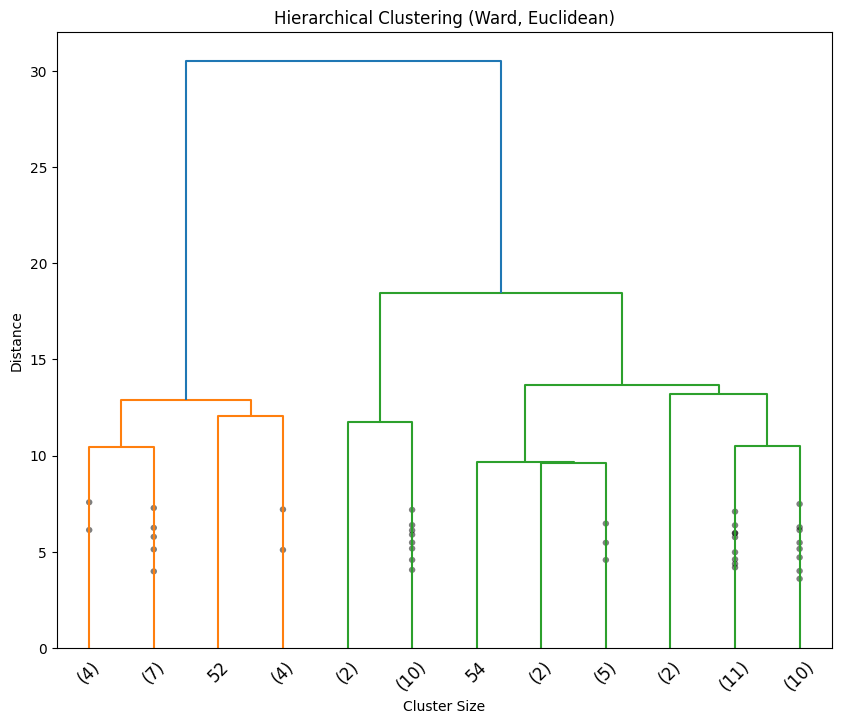

Results of Ward-Euclidean clustering:
Cluster 1 Participant IDs: [3, 8, 13, 15, 17, 18, 19, 21, 33, 36, 40, 44, 49, 51, 53, 56]
Cluster 2 Participant IDs: [7, 10, 11, 14, 26, 35, 38, 39, 41, 43, 45, 47]
Cluster 3 Participant IDs: [1, 2, 4, 5, 6, 9, 12, 16, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 37, 42, 46, 48, 50, 52, 54, 55, 57, 58, 59]


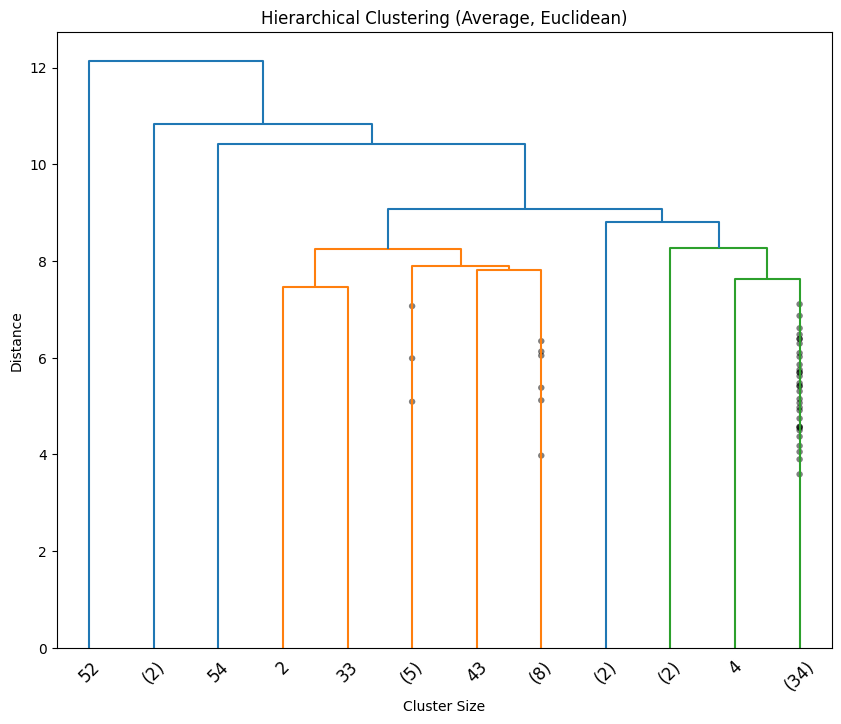

Results of Average-Euclidean clustering:
Cluster 1 Participant IDs: [1, 16]
Cluster 2 Participant IDs: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59]
Cluster 3 Participant IDs: [53]


In [24]:
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Determine the current file path and the parent directory path
current_file_path = Path(__name__).resolve()
parent_directory_path = current_file_path.parent.parent

# Define the input file path
input_file_path = parent_directory_path / "data" / "03_Processed" / "03_Filtered_Selected_Features.csv"


# Load data from the CSV file
data = pd.read_csv(input_file_path)


# Define column transformer
categorical_features = [
    'Community Participation',
    'Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:',
    'Jeżeli pominięto branżę, na której się znasz dopisz ją:'
]
numerical_features = [col for col in data.columns if col not in categorical_features and col != 'Participant ID']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Data preprocessing
data_preprocessed = preprocessor.fit_transform(data)

# Function to draw a dendrogram
def plot_dendrogram(Z, title='Hierarchical Clustering Dendrogram'):
    plt.figure(figsize=(10, 8))
    dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
    plt.title(title)
    plt.xlabel('Cluster Size')
    plt.ylabel('Distance')
    plt.show()

def print_clusters(clusters, method_name):
    cluster_dict = {}
    for i, cluster in enumerate(clusters):
        if cluster not in cluster_dict:
            cluster_dict[cluster] = []
        cluster_dict[cluster].append(i + 1)  # IDs are 1-indexed
    print(f"Results of {method_name} clustering:")
    for key in sorted(cluster_dict):
        print(f"Cluster {key} Participant IDs: {cluster_dict[key]}")

# 'Ward' method with 'euclidean' metric
Z_ward_euclidean = linkage(data_preprocessed, method='ward', metric='euclidean')
plot_dendrogram(Z_ward_euclidean, title="Hierarchical Clustering (Ward, Euclidean)")
clusters_ward = fcluster(Z_ward_euclidean, t=3, criterion='maxclust')
print_clusters(clusters_ward, "Ward-Euclidean")

# 'Average' method with 'euclidean' metric
Z_average_euclidean = linkage(data_preprocessed, method='average', metric='euclidean')
plot_dendrogram(Z_average_euclidean, title="Hierarchical Clustering (Average, Euclidean)")
clusters_average = fcluster(Z_average_euclidean, t=3, criterion='maxclust')
print_clusters(clusters_average, "Average-Euclidean")
